# Trajectory Approximation
These methods can be used to simplify trajectories as a preprocessing step before they are fed to labeled region scanning methods. 

In [1]:
import pyscan
import matplotlib.pyplot as plt
import random
import math

import statistics

def plot_points(ax, pts, c):
    xs = []
    ys = []
    for pt in pts:
        xs.append(pt[0] )
        ys.append(pt[1])
    ax.scatter(xs, ys, color=c)

def plot_points_traj(ax, pts, c):
    xs = []
    ys = []
    for pt in pts:
        xs.append(pt[0])
        ys.append(pt[1])
    ax.plot(xs, ys, color=c)
    
def plot_approx(ax, traj_pts, core_set_pts):
    ax.set_xlim([-.01, 1.01])
    ax.set_ylim([-.01, 1.01])
    plot_points_traj(ax, traj_pts, "g")
    plot_points(ax, core_set_pts, "b")
    ax.set_axis_off()


    

pts = [pyscan.Point(x, y, 1.0) for (x, y) in (
        (0.28076897884325597, 0.5709315642759948), 
        (0.2883670662212526, 0.5731789009659035),
        (0.2804742254535915, 0.5708019102361805), 
        (0.28057247658348744, 0.5704993841433011),
        (0.2807034780899998, 0.5714501804351904), 
        (0.2734656448549006, 0.5746699224236597),
        (0.2902993384423915, 0.5749940575231799), 
        (0.3078862906923401, 0.5769820861334908),
        (0.30896705312110206, 0.5969488082632861),
        (0.32072443833104086, 0.5964301921040598), 
        (0.3307133032029929, 0.5930375780625253),
        (0.34640073360844237, 0.5890183028286218), 
        (0.35494858190868855, 0.588802212762275), 
        (0.3610729023383628, 0.5883916416362222),
        (0.36329992794916616, 0.5732869459990769), 
        (0.37201152813256444, 0.5787108066642039),
        (0.37682583349709176, 0.5840266222961576), 
        (0.3765310801074273, 0.5862307409728461),
        (0.37640007860089164, 0.5878730254770267), 
        (0.3764328289775314, 0.5880675065367327),
        (0.37649832973078756, 0.5883700326295813), 
        (0.37649832973078756, 0.5889750848153402),
        (0.3765310801074273, 0.5894504829612848), 
        (0.3765310801074273, 0.5894504829612848),
        (0.3765310801074273, 0.5894504829612848), 
        (0.3766293312372999, 0.5896017460077398),
        (0.3771533372633727, 0.5939019383278819), 
        (0.3775135914062933, 0.6018324437625461),
        (0.3605816466889298, 0.610000648270198), 
        (0.34266719067270024, 0.6244570737083028),
        (0.3384096417108854, 0.6261857942390467),
        (0.3402764131787448, 0.6249972988741699), 
        (0.36012314141611323, 0.6221881280117534),
        (0.3730922905613496, 0.638567755040308), 
        (0.37581057182156274, 0.6664649826047369),
        (0.3776773432894454, 0.6949456533483143), 
        (0.38265540053710156, 0.7206603712427262),
        (0.3997510971376172, 0.7241826393240749), 
        (0.42909543459750465, 0.7243339023704993),
        (0.43620226632606823, 0.7361540289992835), 
        (0.43679177310539713, 0.7557750070229177),
        (0.4369882753651657, 0.7778810208094789), 
        (0.4371520272483178, 0.7831752274347917),
        (0.43662802122224503, 0.7839963696868667), 
        (0.4390187987161772, 0.7933962875726462),
        (0.4388222964564087, 0.809970395660907), 
        (0.4382982904303359, 0.8370032629599792),
        (0.4391825505993293, 0.8585690515807041), 
        (0.4399030588851706, 0.8777146314583937),
        (0.4402305626514748, 0.8978758346478641), 
        (0.44091832056067637, 0.9170862415454762),
        (0.43639876858583676, 0.925729844199042), 
        (0.4386912949498963, 0.9279555718823406),
        (0.43878954607976894, 0.9269183395639188), 
        (0.43875679570315246, 0.9269399485705596),
        (0.43875679570315246, 0.9269615575772004), 
        (0.43872404532651277, 0.9269831665838106),
        (0.43872404532651277, 0.9270263845970922), 
        (0.43872404532651277, 0.9269183395639188),
        (0.43878954607976894, 0.9269399485705596), 
        (0.4388550468330484, 0.9274153467165043),
        (0.43675902272875744, 0.9279987898956222), 
        (0.4359402633130202, 0.9259675432720297),
        (0.2562716971245123, 0.37042159171941874), 
        (0.2562716971245123, 0.4148497093588573))]


alpha = 1/20

## Halfplane Compression
### Convex Hull
This method takes the convex hull of the trajectory. Since points internal to the convex hull will not effect halfplane labeled scanning we can do this as a preprocessing step to speed up the scanning without effecting the spatial error.

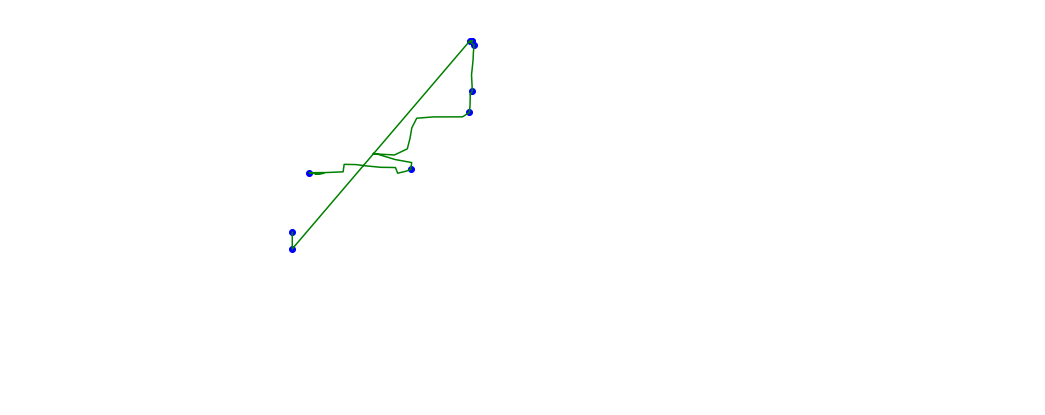

In [2]:
f, ax = plt.subplots(figsize=(18, 7))
core_set_pts = pyscan.hull(pts)
plot_approx(ax, pts, core_set_pts)
plt.show()

### Directional Hull

This method uses an approximation of the convex hull to simplify the trajectory even more. The spatial error is bounded by alpha. In practice this method can reduce the number of points needed significantly over just taking the convex hull, and therefore speed up halplane labeled scanning even more than the previous method.


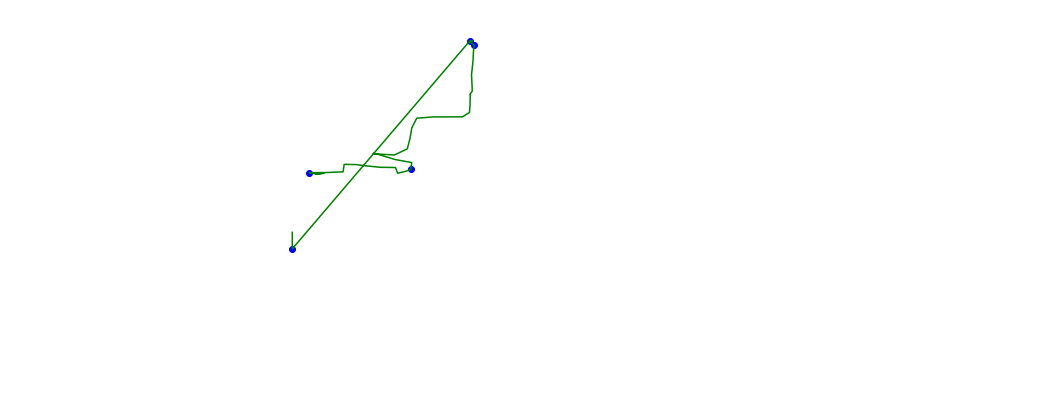

In [3]:
f, ax = plt.subplots(figsize=(18, 7))
core_set_pts = pyscan.halfplane_kernel(pts, alpha)
plot_approx(ax, pts, core_set_pts)
plt.show()

### DP Simplification
This is the popular Douglas Peucker trajectory simplification algorithm. It has the same error guarantees as the Directional Hull method, but usually produces a larger number of points per trajectory.

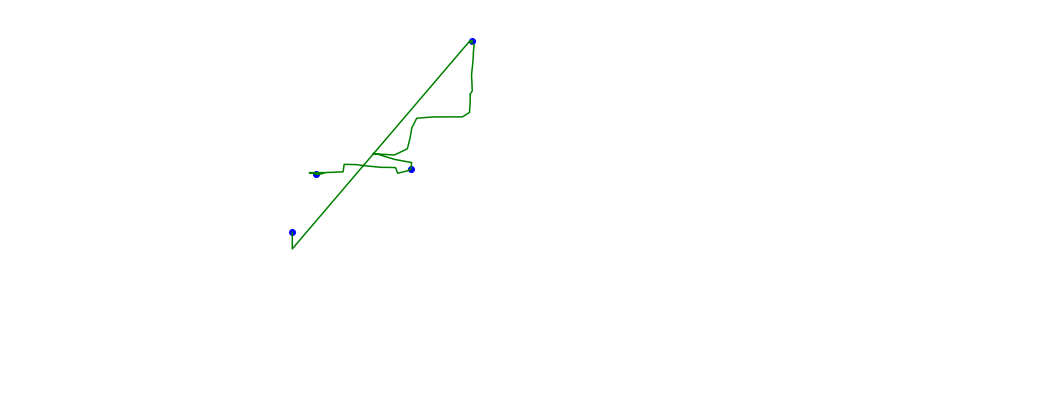

In [4]:
f, ax = plt.subplots(figsize=(18, 7))
core_set_pts = pyscan.dp_compress(pts, alpha)
plot_approx(ax, pts, core_set_pts)
plt.show()

## Disk(or Rectangle) Compression
### Grid Directional Kernel
The grid directional kernel preserves the spatial error with respect to disks of a certain minimum radius. Increasing the minimum radius significantly decreases the number of points needed to approximate the trajectory and approaches the halfplane method.

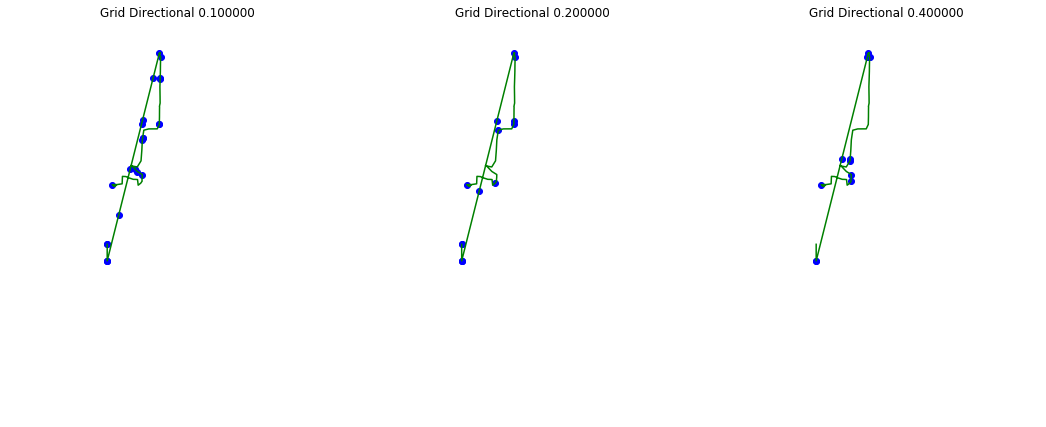

In [5]:
fig, ax = plt.subplots(1, 3, figsize =(18, 7))
i = 0
for min_r in [1/10, 2/10, 4 / 10]:
    chord_l = math.sqrt(4 * alpha * min_r - 2 * alpha * alpha)
    core_set_pts = pyscan.grid_direc_kernel(pts, chord_l, alpha)
    plot_approx(ax[i], pts, core_set_pts)
    ax[i].set_title("Grid Directional %f"%(min_r,))
    i += 1
plt.show()


    

### Lifting Kernel
This lifts the trajectory onto the surface of a paraboloid and then takes a 3d approximate directional kernel in this space. This method currently has issues with stability.

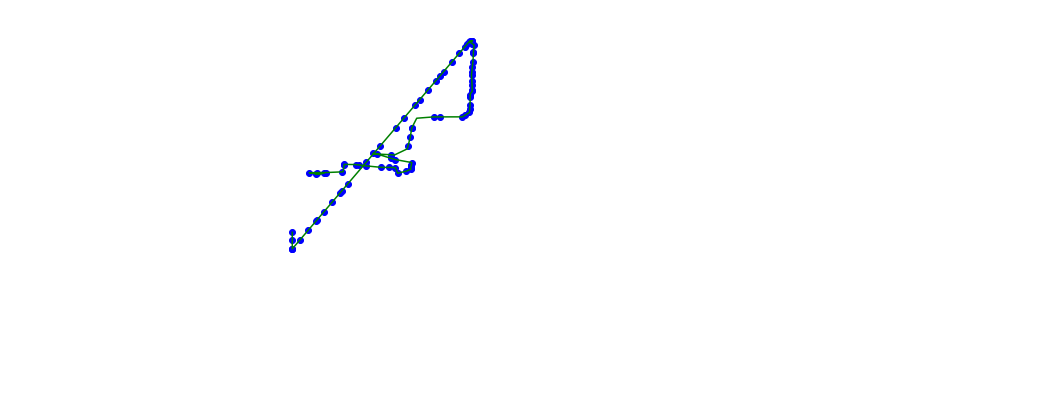

In [6]:
f, ax = plt.subplots(figsize=(18, 7))
core_set_pts = pyscan.lifting_kernel(pts, alpha)
plot_approx(ax, pts, core_set_pts)
plt.show()

### Gridding Methods
These methods grid the trajectory in various ways using a 1 / alpha x 1 / alpha grid. They tend to use
far more points then the previous methods.


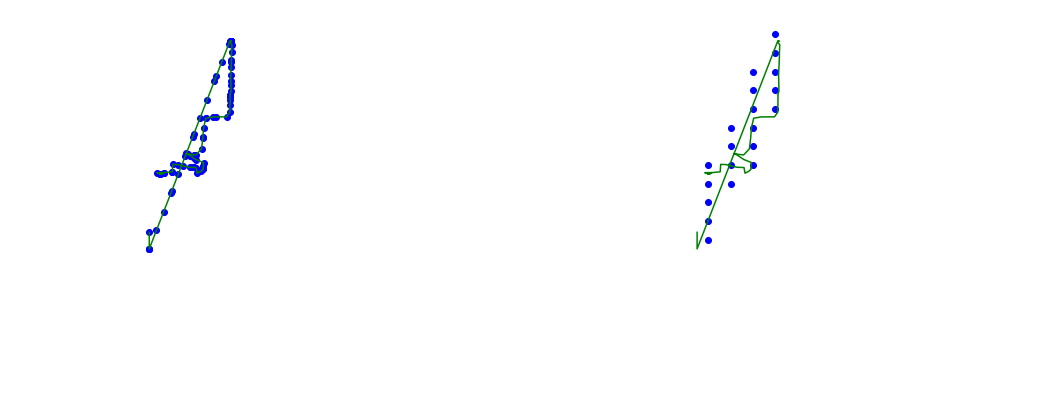

In [7]:
f, ax = plt.subplots(1, 2, figsize=(18, 7))
core_set_pts = pyscan.grid_trajectory(pts, alpha)
plot_approx(ax[0], pts, core_set_pts)
core_set_pts = pyscan.grid_kernel(pts, alpha)
plot_approx(ax[1], pts, core_set_pts)
plt.show()

### Even Simplification
Just takes points evenly along the length of the trajectory. This is a nice general method which can be used as a basis for other methods.

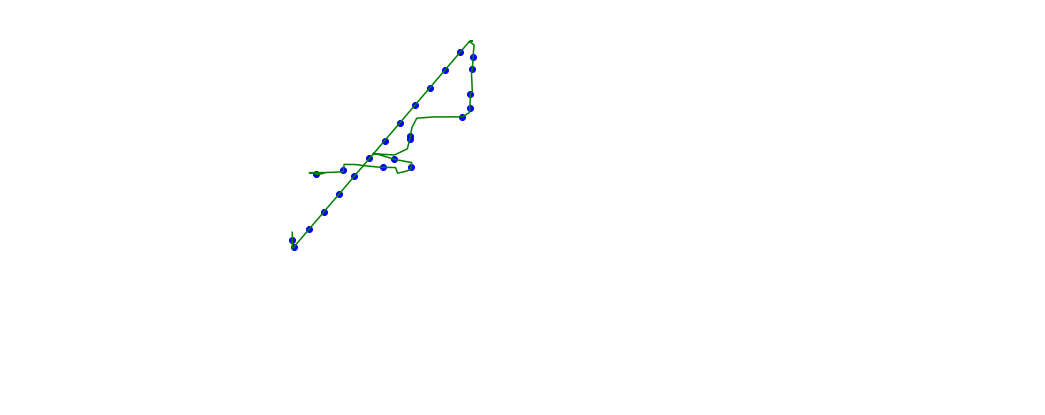

In [8]:
f, ax = plt.subplots(figsize=(18, 7))
core_set_pts = pyscan.even_sample_error(pts, alpha, False)
plot_approx(ax, pts, core_set_pts)
plt.show()